In [1]:
# Importing general Libraries
import pandas as pd  #Use to load the file in rows and columns 
import numpy as np  #Numerical python mathematical operation on matrix vector and array

import seaborn as sns  #Data visualization librie base on matplotlib
import matplotlib.pyplot as plt #Data Visualization librarie
#To plot each graph in jupyter notebook itself below the cell.
%matplotlib inline   
import matplotlib.style
plt.style.use('classic') #Plot the garph in different style "classic"

import warnings
warnings.filterwarnings("ignore")

## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**
1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.


Data Ingestion: 11 marks
# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

### Importing dataset

In [2]:
# Load the dataset of election
vote_df = pd.read_excel('Election_Data.xlsx')

## Exploratory Data Analysis

In [3]:
# First 10 reocrds of the dataset
vote_df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
# Drop the unnamed:0 , not so useful varaible 
vote_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Last 10 records of the dataset
vote_df.tail(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1515,Conservative,82,2,2,2,1,11,2,female
1516,Labour,30,3,4,4,2,4,2,male
1517,Labour,76,4,3,2,2,11,2,male
1518,Labour,50,3,4,4,2,5,2,male
1519,Conservative,35,3,4,4,2,8,2,male
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


### Shape

In [6]:
print('Total number of rows is:',vote_df.shape[0], "\nTotal number of columns is:", vote_df.shape[1])

Total number of rows is: 1525 
Total number of columns is: 9


In [7]:
# Data-types of data feature
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


#### Checking for Possible columns which are Categorical but are not having data type "object"

In [8]:
cat = ['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']

In [9]:
for col in cat:
        print(col.upper(), ':', vote_df[col].nunique())
        print(vote_df[col].value_counts().sort_values())
        print('\n')

ECONOMIC.COND.NATIONAL : 5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD : 5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR : 5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE : 5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE : 11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE : 4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64




In [10]:
# Check the missing values
vote_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
# Check the zero value present inthr records.
for col in vote_df.columns:
    count=(vote_df[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the vote is 0
Number of zero values for the age is 0
Number of zero values for the economic.cond.national is 0
Number of zero values for the economic.cond.household is 0
Number of zero values for the Blair is 0
Number of zero values for the Hague is 0
Number of zero values for the Europe is 0
Number of zero values for the political.knowledge is 455
Number of zero values for the gender is 0


- Political_knowledge have 454 reocrds as zero and it is accepted because the value starts from 0 to 3. 
- There are no zero values present in the data-set except political_knowledge.

In [12]:
# Check the duplicate records
dup = vote_df.duplicated()
print("Number of duplicated rows:",vote_df.duplicated().sum())
vote_df[dup]

Number of duplicated rows: 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
# Drop the duplicate reocrds
vote_df.drop_duplicates(inplace=True)

In [14]:
# Statistics Summary for numerical features
vote_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [15]:
# statsitics summary for categorical variable.
vote_df[['vote','gender']].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [16]:
## Let's rename columns to remove space before we impute
vote_df.rename(columns = {"economic.cond.national":"economic_cond_national", "economic.cond.household":"economic_cond_household", "political.knowledge":"political_knowledge"}, inplace=True)

In [17]:
vote_df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

## Insights
1. Drop the column "Unnamed: 0", not so useful feature.	
2. There is no missing value present in the dataset.
3. There is total 8 features out of which 2 are object data-type and 6 are integer data-type.
4. Possible columns which are Categorical but are not having data type "object" such as 'economic.cond.national','economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge'. 
5. There are total 8 duplicate records. We treated duplicated records by droping them and only keeping the original records in the datset. 
6. We Rename the columns economic.cond.national', 'economic.cond.household', 'political.knowledge' with economic_cond_national', 'economic_cond_household','political_knowledge'.

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

## Univariate Analysis

Text(0.5, 0, 'Age')

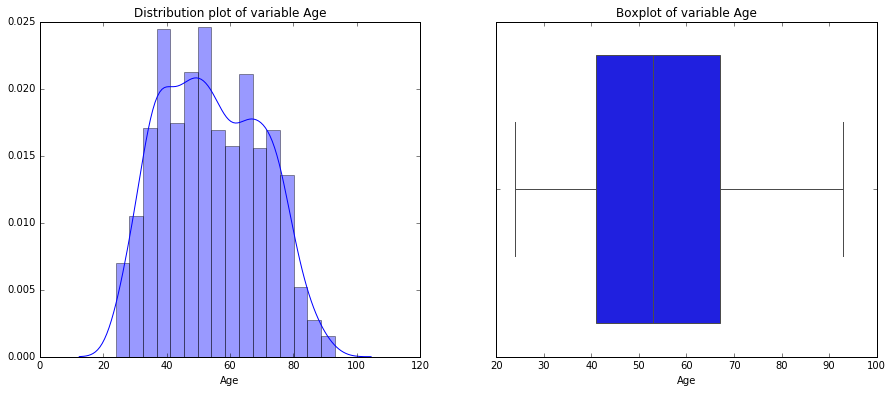

In [18]:
# univariante Analysis 
# To perform Univariate analysis on Continuous variable
# lets plot the distribution plot and a box plot 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(vote_df.age,kde=True )
plt.title("Distribution plot of variable Age")
plt.xlabel('Age')

plt.subplot(1,2,2)
sns.boxplot(vote_df.age)
plt.title('Boxplot of variable Age')
plt.xlabel('Age')

- The distribution plot for the varaible age is almost nomally distributed.
- There are no outliers present in the variable age.

In [19]:
# Making a list of categorical features.
features = ['vote','economic_cond_national', 'economic_cond_household','Blair', 'Hague', 'Europe', 'political_knowledge','gender']

VOTE


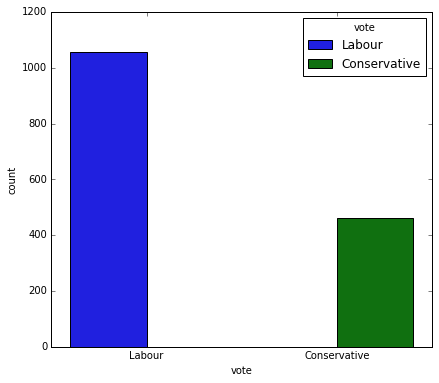

ECONOMIC_COND_NATIONAL


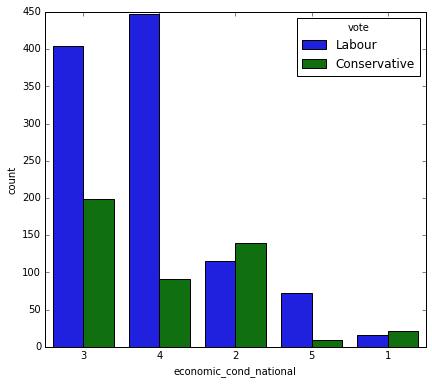

ECONOMIC_COND_HOUSEHOLD


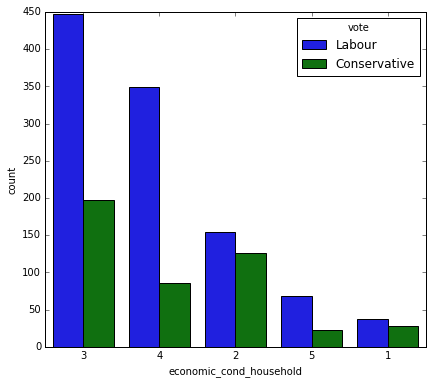

BLAIR


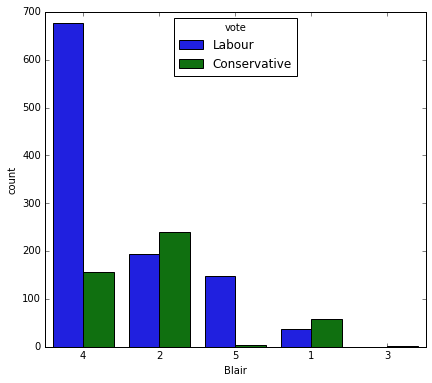

HAGUE


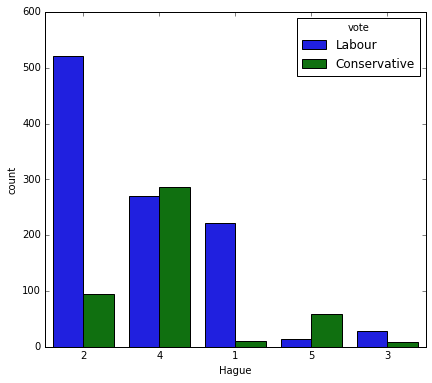

EUROPE


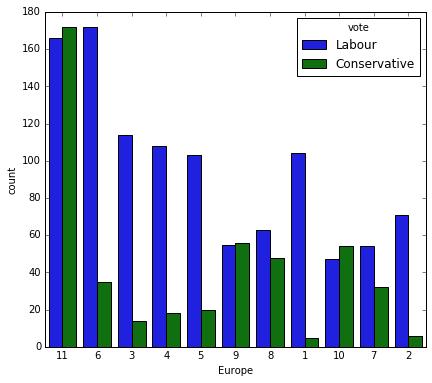

POLITICAL_KNOWLEDGE


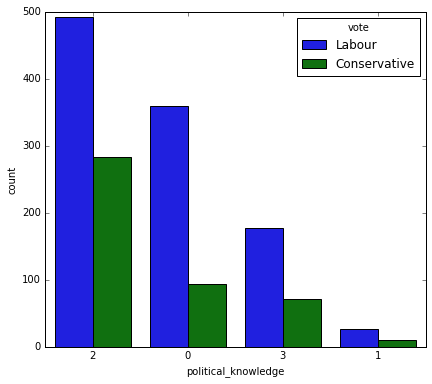

GENDER


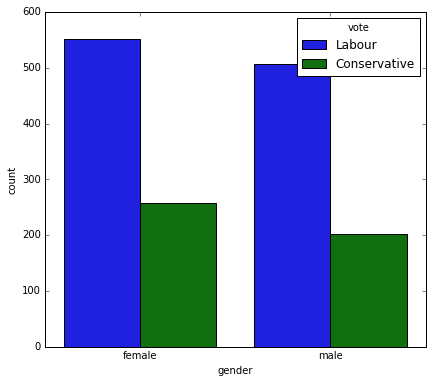

In [20]:
# Univariate Analysis
# To perform Univariant analysis on Discrete categorical variable lets plot the count plot
for col in features:
    print(col.upper())
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.countplot(data=vote_df, x = vote_df[col], hue=vote_df['vote'] ,order=vote_df[col].value_counts().index)
    #plt.subplot(1,2,2)
    #sns.barplot(x=vote_df[col], y=vote_df['vote'])
    plt.show()

## Outliers 

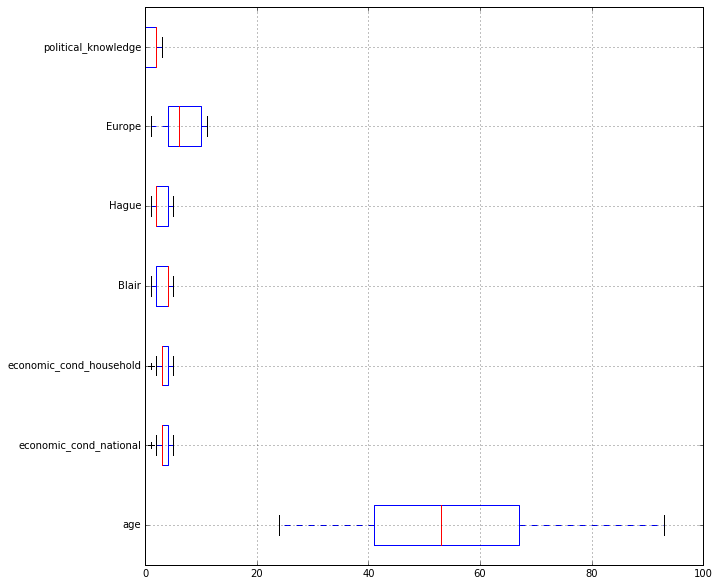

In [21]:
# To check the Outliers present in the dataset.
# construct box plot for descrite categorical variables.
plt.figure(figsize=(10,10))
vote_df.boxplot(vert=0)
plt.show()

There is no outliers present in the data-set.

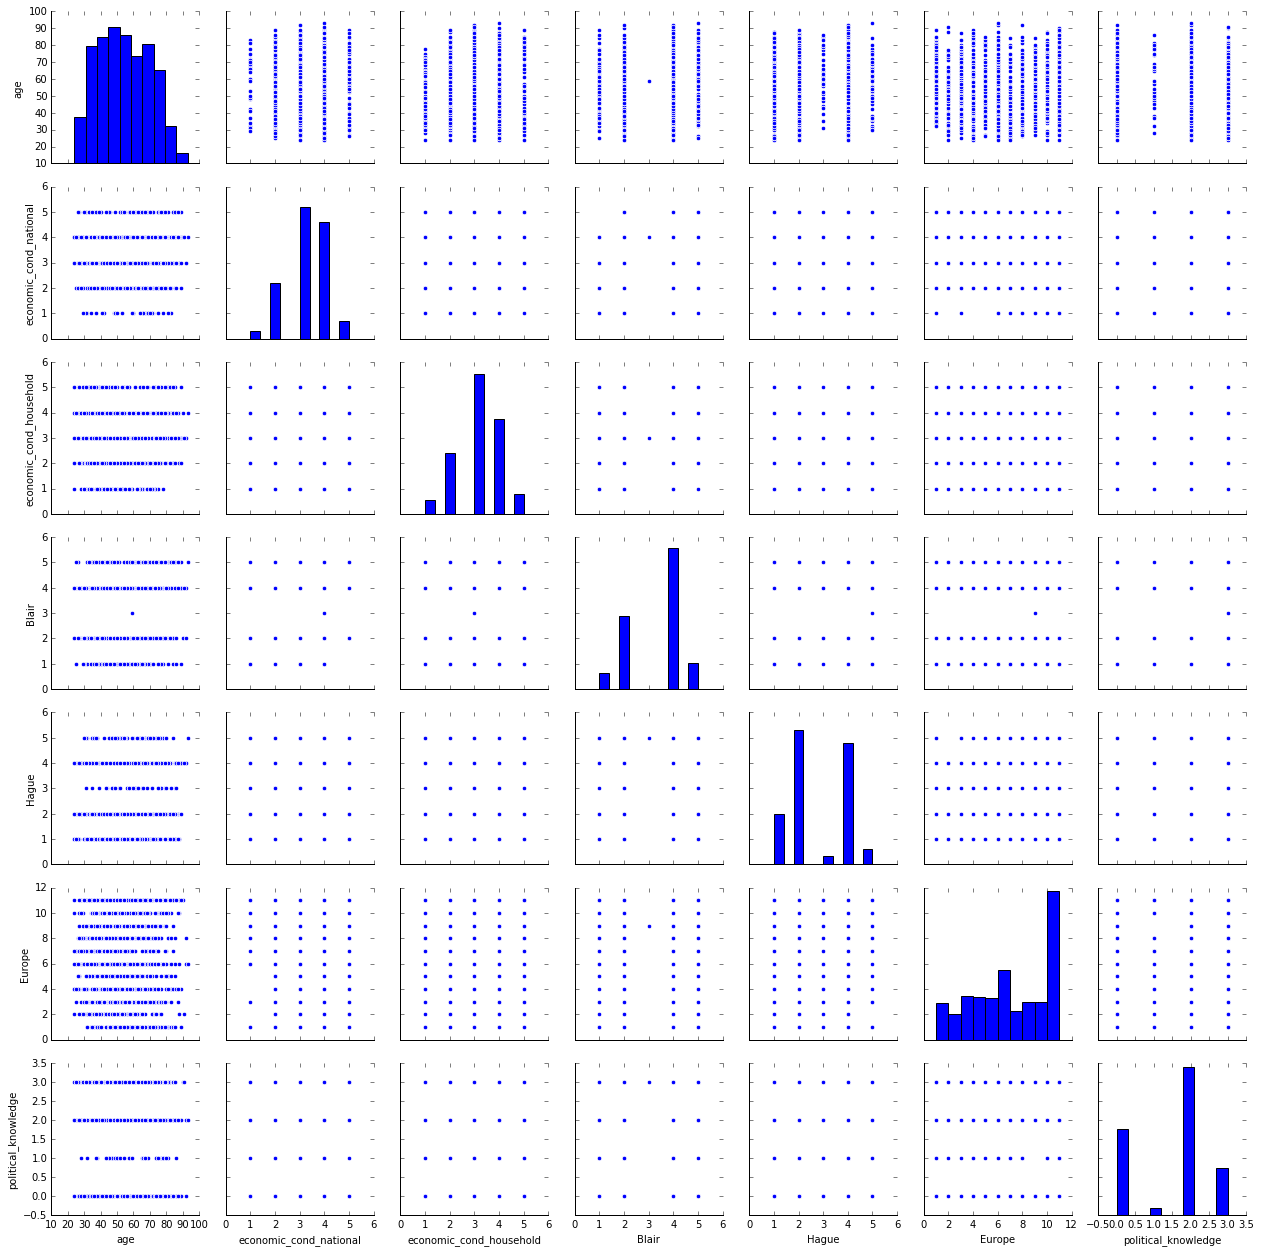

In [22]:
# Bivariate Analysis 
sns.pairplot(vote_df)

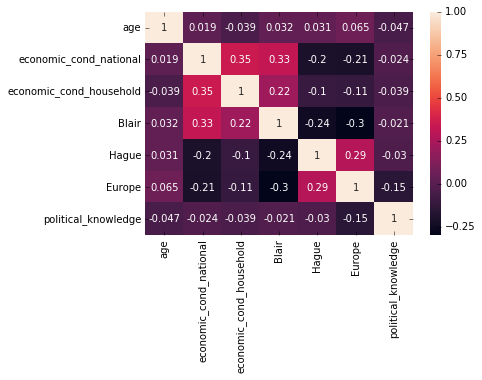

In [23]:
# Heat Map 
sns.heatmap(vote_df.corr(), annot=True)

There is no strong corrlation between the features, therefore Multicollinearity doesn't exist in our dataset. 

## Data Preparation: 4 marks

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks

### Encode the data

In [24]:
# Changing the datatype and assigning codes to each category.
vote_df['vote']=np.where(vote_df['vote'] =='Labour', '0', vote_df['vote'])
vote_df['vote']=np.where(vote_df['vote'] =='Conservative', '1', vote_df['vote'])
vote_df['gender']=np.where(vote_df['gender'] =='female', '0', vote_df['gender'])
vote_df['gender']=np.where(vote_df['gender'] =='male', '1', vote_df['gender'])

In [25]:
# Change the datatype of age and vote variable 
vote_df['vote'] = vote_df['vote'].astype('int8')
vote_df['gender'] = vote_df['gender'].astype('int8')

In [26]:
vote_df.head(10)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1
5,0,47,3,4,4,4,4,2,1
6,0,57,2,2,4,4,11,2,1
7,0,77,3,4,4,1,1,0,1
8,0,39,3,3,4,4,11,0,0
9,0,70,3,2,5,1,11,2,1


In [27]:
vote_df.vote.value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [28]:
100*vote_df['vote'].value_counts() / len(vote_df['vote'])

0    69.676994
1    30.323006
Name: vote, dtype: float64

- Data is highly imbalanced, ratio is 69:30

In [29]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


In [30]:
# Check the lables and the frquency for vote feature.
vote_df['vote'].value_counts() # target variable is imbalance.

0    1057
1     460
Name: vote, dtype: int64

In [31]:
vote_df.var() # difference scales for each variable.

vote                         0.211421
age                        246.544655
economic_cond_national       0.777558
economic_cond_household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political_knowledge          1.175961
gender                       0.249099
dtype: float64

## Scaling the Age variables as continuous variable have different weightage using Min-Max techinque

- For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.
- Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

In [32]:
num = ['age']

In [33]:
vote_df[num] = vote_df[num].apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [34]:
vote_df.head(10)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,0,0.275362,3,3,4,1,2,2,0
1,0,0.173913,4,4,4,4,5,2,1
2,0,0.159420,4,4,5,2,3,2,1
3,0,0.000000,4,2,2,1,4,0,0
4,0,0.246377,2,2,1,1,6,2,1
5,0,0.333333,3,4,4,4,4,2,1
6,0,0.478261,2,2,4,4,11,2,1
7,0,0.768116,3,4,4,1,1,0,1
8,0,0.217391,3,3,4,4,11,0,0
9,0,0.666667,3,2,5,1,11,2,1


Now are data-set is ready to apply to the model and remove insights from it.

In [35]:
# Copy all the predictor variables into X dataframe
x = vote_df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = vote_df['vote']

### Train Test Split

In [36]:
# Train-Test split 
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [38]:
y_train.value_counts(1)

0    0.71065
1    0.28935
Name: vote, dtype: float64

In [39]:
y_test.value_counts(1)

0    0.664474
1    0.335526
Name: vote, dtype: float64

In [40]:
x_train

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
991,0.144928,2,4,1,4,11,2,0
1274,0.231884,4,3,4,4,6,0,1
649,0.536232,4,3,4,4,7,2,0
677,0.333333,3,3,4,2,11,0,1
538,0.289855,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
717,0.405797,3,3,4,1,6,2,0
908,0.275362,3,4,2,2,9,2,0
1100,0.724638,4,3,5,4,11,0,0
236,0.101449,3,3,2,3,6,0,0


In [41]:
y_train

991     1
1274    0
649     1
677     0
538     0
       ..
717     0
908     1
1100    0
236     0
1065    0
Name: vote, Length: 1061, dtype: int8

In [42]:
## Modeling: 22 marks

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

## Logistic Regression

In [43]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression(n_jobs=2, verbose=True)
model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(n_jobs=2, verbose=True)

In [45]:
y_predict = model.predict(x_test)

In [46]:
model.score(x_train, y_train)

0.8312912346842601

In [47]:
# Fit the Logistic Regression model
model_1 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_1.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [48]:
ytrain_predict = model_1.predict(x_train)
ytest_predict = model_1.predict(x_test)

In [49]:
ytest_predict_prob=model_1.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.575716,0.424284
1,0.851574,0.148426
2,0.992813,0.007187
3,0.163650,0.836350
4,0.931593,0.068407


In [50]:
# Accuracy - Training Data
model_1.score(x_train, y_train)

0.8312912346842601

In [51]:
# Accuracy - Test Data
model_1.score(x_test, y_test)

0.8355263157894737

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.890


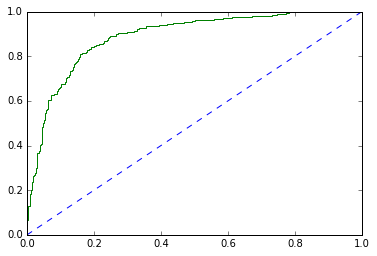

In [53]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


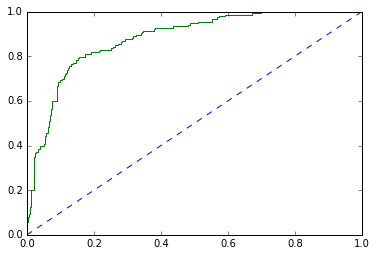

In [54]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

[[686  68]
 [111 196]]


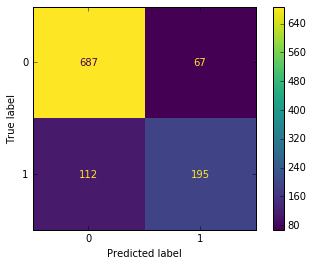

In [55]:
print(confusion_matrix(y_train, ytrain_predict))
plot_confusion_matrix(model,x_train,y_train);

In [56]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



[[268  35]
 [ 40 113]]


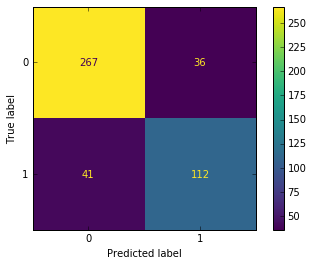

In [57]:
print(confusion_matrix(y_test, ytest_predict))
plot_confusion_matrix(model,x_test,y_test);

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



## Linear Discriminant Analaysis

In [59]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)

In [61]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(x_test)

In [62]:
from sklearn import metrics

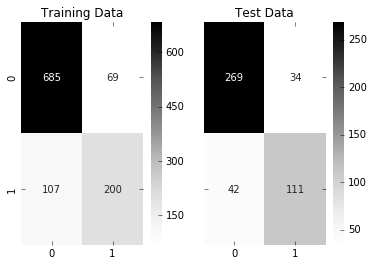

In [63]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [64]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [65]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

In [66]:
pred_prob_train[:,1]

array([0.94921647, 0.07824062, 0.30738873, ..., 0.22088844, 0.20838927,
       0.01886825])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


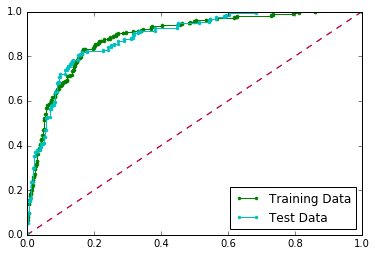

In [67]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

## K Nearest Neighbours

In [68]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

In [69]:
len(vote_df.columns)

9

In [70]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print("\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\n",metrics.classification_report(y_train, y_train_predict))

0.8510838831291234

 [[683  71]
 [ 87 220]]

               precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.76      0.72      0.74       307

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [72]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8114035087719298

 [[265  38]
 [ 48 105]]

               precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.73      0.69      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.888


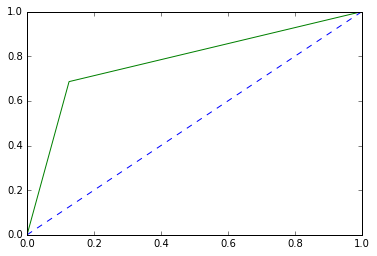

In [73]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, y_test_predict)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC for the Training Data: 0.811
AUC for the Test Data: 0.780


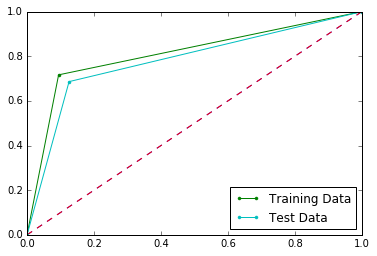

In [74]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

As the difference between train and test accuracies is less than 10%, it is a valid model

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [75]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22807017543859653,
 0.19517543859649122,
 0.1885964912280702,
 0.19517543859649122,
 0.17543859649122806,
 0.17105263157894735,
 0.18201754385964908,
 0.16666666666666663,
 0.16447368421052633,
 0.17105263157894735]

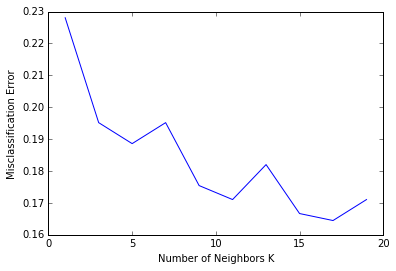

In [76]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [77]:
KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [78]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print("\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\n",metrics.classification_report(y_train, y_train_predict))

0.8378887841658812

 [[682  72]
 [100 207]]

               precision    recall  f1-score   support

           0       0.87      0.90      0.89       754
           1       0.74      0.67      0.71       307

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [79]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8355263157894737

 [[271  32]
 [ 43 110]]

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.72      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC for the Training Data: 0.789
AUC for the Test Data: 0.807


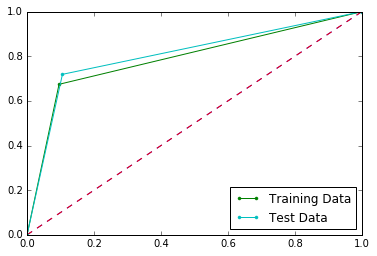

In [80]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Naive Bayes Model

In [81]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [82]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [83]:
y_train_predict = NB_model.predict(x_train)
model_score = NB_model.score(x_train, y_train)                      ## Accuracy
print(model_score)
print("\n",metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print('\n',metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8350612629594723

 [[675  79]
 [ 96 211]]

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [84]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)                    ## Accuracy
print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print("\n",metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315

 [[263  40]
 [ 41 112]]

               precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [85]:
NB_model.score(x_train, y_train)

0.8350612629594723

In [86]:
NB_model.score(x_test, y_test)

0.8223684210526315

AUC for the Training Data: 0.791
AUC for the Test Data: 0.800


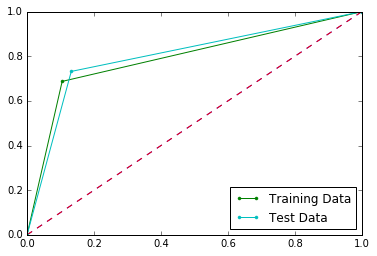

In [87]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

## Bagging (Random Forest )

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)

Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [89]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)

print(model_score)
print("\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\n",metrics.classification_report(y_train, y_train_predict))

0.9670122525918945

 [[749   5]
 [ 30 277]]

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       754
           1       0.98      0.90      0.94       307

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



AUC for the Training Data: 0.948
AUC for the Test Data: 0.800


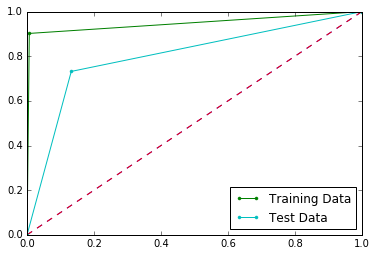

In [90]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train, y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [91]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8289473684210527

 [[274  29]
 [ 49 104]]

               precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [92]:
1-0.82

0.18000000000000005

## Boosting

### Ada Boost

In [93]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [94]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)

print(model_score)
print("\n", metrics.confusion_matrix(y_train, y_train_predict))
print("\n", metrics.classification_report(y_train, y_train_predict))

0.8501413760603205

 [[688  66]
 [ 93 214]]

               precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [95]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8135964912280702

 [[268  35]
 [ 50 103]]

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC for the Training Data: 0.805
AUC for the Test Data: 0.779


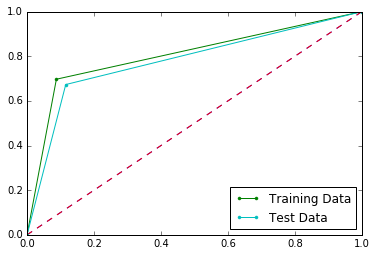

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train, y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Gradient Boost

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [98]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)

print(model_score)
print("\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\n",metrics.classification_report(y_train, y_train_predict))

0.8925541941564562

 [[708  46]
 [ 68 239]]

               precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [99]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8333333333333334

 [[276  27]
 [ 49 104]]

               precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.79      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.859
AUC for the Test Data: 0.795


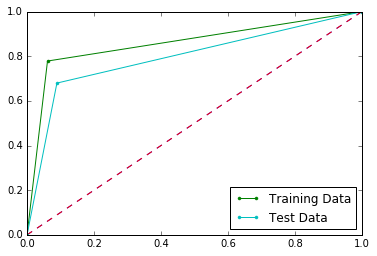

In [100]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train, y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Comparison of Different Model

The most important Model Evaluation metric here is Recall. Recall (red cells) is a measurement of the proportion of correct #### positive results, and is also known as the True Positive Rate, or Sensitivity.
Reason:
i)Accuracy is not considered because we have an imbalanced dataset.
ii)Our main goal here is to reduce the Type-2 error i.e False-Negative.
For e.g Consider a person actually has cancer and the model model predicted no cancer. This can be a disaster.¶

Interest Class is 1 i.e. conservation = 1

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Logistic Regression  - Recall for class "1" is  0.64

             precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Linear Discriminant Analysis  - Recall for class "1" is  0.65

                precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



KNN  - Recall for class "1" is  0.72

             precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.76      0.72      0.74       307

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061


Naive Bayes - Recall for class "1" is 0.69


                precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061




Bagging(Random Forest)  - Recall for class "1" is  1 (100%)
                 
                precision    recall  f1-score   support

           0       0.96      0.99      0.98       754
           1       0.98      0.90      0.94       307

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



ADA Boosting  - Recall for class "1" is  0.70


                precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061


Gradient Boosting - Recall for class "1" is 0.78

                precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

 
So as per the train data, 
- Worst performing models are - Linear Discriminant Analysis
- Best Performing models are - Decision Tree ,  Random Forest and Bagging

However are these best performing models overfitted.. 

Let's look at the performance on the test data set

Recall on the Test Data Set


Logistic Regression  - Recall for class "1" is  0.74

             precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456

Linear Discriminant Analysis  - Recall for class "1" is  0.73

                precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



KNN  - Recall for class "1" is  0.69

             precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.73      0.69      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456


Naive Bayes - Recall for class "1" is 0.73


                precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456




Bagging  - Recall for class "1" is  1 (100%)
                 
                precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.74      0.71      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



ADA Boosting  - Recall for class "1" is  0.70


                precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.70      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456


Gradient Boosting - Recall for class "1" is 0.68

                precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.79      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Model which have not performed well on the train data set , also have not performed well on the test data set
However Decision Tree ,Random Forest and Bagging which had a 100% score on the train data set have shown a poor result on the test data set .. Hence a clear case of overfitting.



In [101]:
## SMOTE 

In [102]:
from imblearn.over_sampling import SMOTE

### SMOTE is only applied on the train data set

In [103]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [104]:
## Let's check the shape after SMOTE
x_train_res.shape

(1508, 8)

In [105]:
# After applying SMOTE on y_train set
y_train_res.shape

(1508,)

In [106]:
# before applying the SMOTE on y_train set
y_train.shape

(1061,)

- We can see that our resample y_train has now 1508 syntetic records generated. 

## Naive Bayes with SMOTE

In [107]:
NB_model = GaussianNB()
NB_model.fit(x_train_res, y_train_res)

GaussianNB()

In [108]:
y_train_predict = NB_model.predict(x_train_res)
model_score = NB_model.score(x_train_res, y_train_res)                      ## Accuracy
print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))          ## confusion_matrix
print('\n',metrics.classification_report(y_train_res, y_train_predict))     ## classification_report

0.8275862068965517

 [[621 133]
 [127 627]]

               precision    recall  f1-score   support

           0       0.83      0.82      0.83       754
           1       0.82      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



In [109]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)                    ## Accuracy
print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print("\n",metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8070175438596491

 [[245  58]
 [ 30 123]]

               precision    recall  f1-score   support

           0       0.89      0.81      0.85       303
           1       0.68      0.80      0.74       153

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



## KNN with SMOTE

In [110]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train_res, y_train_res)

KNeighborsClassifier()

In [111]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train_res)
model_score = KNN_model.score(x_train_res, y_train_res)
print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.896551724137931

 [[638 116]
 [ 40 714]]

               precision    recall  f1-score   support

           0       0.94      0.85      0.89       754
           1       0.86      0.95      0.90       754

    accuracy                           0.90      1508
   macro avg       0.90      0.90      0.90      1508
weighted avg       0.90      0.90      0.90      1508



In [112]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8026315789473685

 [[243  60]
 [ 30 123]]

               precision    recall  f1-score   support

           0       0.89      0.80      0.84       303
           1       0.67      0.80      0.73       153

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.82      0.80      0.81       456



## Bagging with SMOTE

In [113]:
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)

Bagging_model.fit(x_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [114]:
y_train_predict = Bagging_model.predict(x_train_res)
model_score =Bagging_model.score(x_train_res, y_train_res)

print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.9728116710875332

 [[726  28]
 [ 13 741]]

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       754
           1       0.96      0.98      0.97       754

    accuracy                           0.97      1508
   macro avg       0.97      0.97      0.97      1508
weighted avg       0.97      0.97      0.97      1508



In [115]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8223684210526315

 [[260  43]
 [ 38 115]]

               precision    recall  f1-score   support

           0       0.87      0.86      0.87       303
           1       0.73      0.75      0.74       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## Logistic Regression with SMOTE

In [116]:
# Fit the Logistic Regression model
model_1 = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=2)
model_1.fit(x_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [117]:
y_train_predict = model_1.predict(x_train_res)
model_score = model_1.score(x_train_res, y_train_res)

print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.8381962864721485

 [[627 127]
 [117 637]]

               precision    recall  f1-score   support

           0       0.84      0.83      0.84       754
           1       0.83      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [118]:
## Performance Matrix on test data set
y_test_predict = model_1.predict(x_test)
model_score = model_1.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8092105263157895

 [[244  59]
 [ 28 125]]

               precision    recall  f1-score   support

           0       0.90      0.81      0.85       303
           1       0.68      0.82      0.74       153

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



## Linear Discrimint Analysis with SMOTE

In [119]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train_res,y_train_res)

In [120]:
y_train_predict = model.predict(x_train_res)
model_score = model.score(x_train_res, y_train_res)

print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.8362068965517241

 [[629 125]
 [122 632]]

               precision    recall  f1-score   support

           0       0.84      0.83      0.84       754
           1       0.83      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [121]:
## Performance Matrix on test data set
y_test_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8070175438596491

 [[242  61]
 [ 27 126]]

               precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.67      0.82      0.74       153

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



## Ada Boost with SMOTE

In [122]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [123]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train_res)
model_score = ADB_model.score(x_train_res, y_train_res)

print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.8687002652519894

 [[642 112]
 [ 86 668]]

               precision    recall  f1-score   support

           0       0.88      0.85      0.87       754
           1       0.86      0.89      0.87       754

    accuracy                           0.87      1508
   macro avg       0.87      0.87      0.87      1508
weighted avg       0.87      0.87      0.87      1508



In [124]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8070175438596491

 [[249  54]
 [ 34 119]]

               precision    recall  f1-score   support

           0       0.88      0.82      0.85       303
           1       0.69      0.78      0.73       153

    accuracy                           0.81       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.82      0.81      0.81       456



## Gradient Boost with SMOTE

In [125]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train_res, y_train_res)

In [126]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train_res)
model_score = gbcl.score(x_train_res, y_train_res)

print(model_score)
print("\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\n",metrics.classification_report(y_train_res, y_train_predict))

0.8992042440318302

 [[665  89]
 [ 63 691]]

               precision    recall  f1-score   support

           0       0.91      0.88      0.90       754
           1       0.89      0.92      0.90       754

    accuracy                           0.90      1508
   macro avg       0.90      0.90      0.90      1508
weighted avg       0.90      0.90      0.90      1508



In [127]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)

print(model_score)
print("\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\n",metrics.classification_report(y_test, y_test_predict))

0.8157894736842105

 [[254  49]
 [ 35 118]]

               precision    recall  f1-score   support

           0       0.88      0.84      0.86       303
           1       0.71      0.77      0.74       153

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


In [128]:
# Comparing different model before applying SMOTE

In [129]:
columns = ['LR_train', 'LR_test', 'LDA_train', 'LDA_test', 'KNN_train', 'KNN_test', 'NB_train', 'NB_test', 'Bagg_train', 'Bagg_test', 'Ada_train','Ada_test', 'Gradi_train', 'Gradi_test']

In [130]:
index = ['Logistic_Regression', 'Linear_Discrimint_Analysis', 'K_Nearest_Neighbour', 'Naive_Bayes', 'Bagging', 'Ada_Boost', 'Gradient_Boost']

In [131]:
columns = ['Acc_train', 'Acc_test', 'Recall_train', 'Recall_test']

In [132]:
df_beforeSMOTE = pd.DataFrame(columns = columns, index = index)
df_beforeSMOTE

,Acc_train,Acc_test,Recall_train,Recall_test
Logistic_Regression,NaN,NaN,NaN,NaN
Linear_Discrimint_Analysis,NaN,NaN,NaN,NaN
K_Nearest_Neighbour,NaN,NaN,NaN,NaN
Naive_Bayes,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN
Ada_Boost,NaN,NaN,NaN,NaN
Gradient_Boost,NaN,NaN,NaN,NaN


In [133]:
df_beforeSMOTE['Acc_train'] = [0.83,0.83,0.85,0.84,0.97,0.85,0.89]
df_beforeSMOTE['Acc_test'] = [0.84,0.83,0.81,0.82,0.83,0.81,0.83]
df_beforeSMOTE['Recall_train'] = [0.64,0.65,0.72,0.69,0.90,0.70,0.78]
df_beforeSMOTE['Recall_test'] = [0.74,0.73,0.69,0.73,0.68,0.67,0.68]

In [134]:
df_beforeSMOTE

,Acc_train,Acc_test,Recall_train,Recall_test
Logistic_Regression,0.83,0.84,0.64,0.74
Linear_Discrimint_Analysis,0.83,0.83,0.65,0.73
K_Nearest_Neighbour,0.85,0.81,0.72,0.69
Naive_Bayes,0.84,0.82,0.69,0.73
Bagging,0.97,0.83,0.90,0.68
Ada_Boost,0.85,0.81,0.70,0.67
Gradient_Boost,0.89,0.83,0.78,0.68


In [135]:
# Comparing different model after applying SMOTE

In [136]:
columns1 = ['Acc_train_res', 'Acc_test', 'Recall_train_res', 'Recall_test']

In [137]:
df_afterSMOTE = pd.DataFrame(columns = columns1, index = index)
df_afterSMOTE

,Acc_train_res,Acc_test,Recall_train_res,Recall_test
Logistic_Regression,NaN,NaN,NaN,NaN
Linear_Discrimint_Analysis,NaN,NaN,NaN,NaN
K_Nearest_Neighbour,NaN,NaN,NaN,NaN
Naive_Bayes,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN
Ada_Boost,NaN,NaN,NaN,NaN
Gradient_Boost,NaN,NaN,NaN,NaN


In [138]:
df_afterSMOTE['Acc_train_res'] = [0.84,0.84,0.90,0.83,0.97,0.87,0.90]
df_afterSMOTE['Acc_test'] = [0.81,0.81,0.80,0.81,0.82,0.81,0.82]
df_afterSMOTE['Recall_train_res'] = [0.84,0.84,0.95,0.83,0.98,0.89,0.92]
df_afterSMOTE['Recall_test'] = [0.82,0.82,0.80,0.80,0.75,0.78,0.77]

In [139]:
df_afterSMOTE

,Acc_train_res,Acc_test,Recall_train_res,Recall_test
Logistic_Regression,0.84,0.81,0.84,0.82
Linear_Discrimint_Analysis,0.84,0.81,0.84,0.82
K_Nearest_Neighbour,0.90,0.80,0.95,0.80
Naive_Bayes,0.83,0.81,0.83,0.80
Bagging,0.97,0.82,0.98,0.75
Ada_Boost,0.87,0.81,0.89,0.78
Gradient_Boost,0.90,0.82,0.92,0.77


## Inference: 5 marks
## 1.8 Based on these predictions, what are the insights? (5 marks)

# -----------------------------------------------------------------------------------------------------------

## Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [140]:
# importing the neccesary libraries along with the standard libraries.
import nltk  # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import pandas as pd 
import numpy as np 
import random 
import string           # this is used for string manipulations
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
#print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.0
Pandas version: 1.0.5
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.4


In [142]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [144]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [145]:
speech_data1 = inaugural.raw('1941-Roosevelt.txt')
speech_data1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

Tokenization
 
Tokenization is the first step in NLP. It is the process of breaking strings into tokens which in turn are small structures or units. Tokenization involves three steps which are breaking a complex sentence into words, understanding the importance of each word with respect to the sentence and finally produce structural description on an input sentence.

In [146]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
token_sent1 = sent_tokenize(speech_data1)
print(token_sent1)

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.', "In Washington's day the task of the people was to create and weld together a nation.", "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.", 'In this day the task of the people is to save that Nation and its institutions from disruption from without.', 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.', 'If we do not, we risk the real peril of inaction.', 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.', 'The life of a man is three-score years and ten: a little more, a little less.', 'The life of a nation is the fullness of the measure of its will to live.', 'There are men who doubt this.', 'There are men who believe 

In [147]:
len(token_sent1)

68

In [148]:
# Word Tokenization
# Stemming usually refers to normalizing words into its base form or root form.
stemmer = SnowballStemmer("english")

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(speech_data1)
token_words_1 = [stemmer.stem(t) for t in tokenized_word]
print(token_words_1)

['on', 'each', 'nation', 'day', 'of', 'inaugur', 'sinc', '1789', ',', 'the', 'peopl', 'have', 'renew', 'their', 'sens', 'of', 'dedic', 'to', 'the', 'unit', 'state', '.', 'in', 'washington', "'s", 'day', 'the', 'task', 'of', 'the', 'peopl', 'was', 'to', 'creat', 'and', 'weld', 'togeth', 'a', 'nation', '.', 'in', 'lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'peopl', 'was', 'to', 'preserv', 'that', 'nation', 'from', 'disrupt', 'from', 'within', '.', 'in', 'this', 'day', 'the', 'task', 'of', 'the', 'peopl', 'is', 'to', 'save', 'that', 'nation', 'and', 'it', 'institut', 'from', 'disrupt', 'from', 'without', '.', 'to', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happen', ',', 'to', 'paus', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recal', 'what', 'our', 'place', 'in', 'histori', 'has', 'been', ',', 'and', 'to', 'rediscov', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.', 'if', 'we', 'do', 'not', ',', 'we', 'risk', '

In [149]:
# Total number of characters present in the speech 1
characters = list(string.punctuation)
token_char1 = [word for word in token_words_1 if word in characters]
token_char1

[',',
 '.',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ':',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 ';',
 ';',
 ';',
 ',',
 ',',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 '.',
 ';',
 ',',
 '.',
 '.',
 ',',
 '.',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 ',',
 ':',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.']

In [150]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(token_words_1)
print(fdist)

<FreqDist with 462 samples and 1526 outcomes>


In [151]:
fdist.most_common(20)

[('the', 114),
 ('of', 81),
 (',', 77),
 ('.', 68),
 ('and', 47),
 ('it', 38),
 ('to', 36),
 ('in', 35),
 ('we', 32),
 ('a', 31),
 ('--', 25),
 ('is', 24),
 ('that', 23),
 ('nation', 17),
 ('our', 14),
 ('not', 13),
 ('this', 12),
 ('all', 11),
 ('has', 10),
 ('for', 10)]

In [152]:
# Stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'their', 'for', 'needn', 'yourselves', 'they', 'be', 'with', 'if', 'than', 'don', 'should', 'its', 'itself', "aren't", 'in', 'has', 'above', 'aren', 'himself', 'up', 'our', 'such', 'few', "you'd", 'more', 'both', 'an', 's', 'doing', 'against', 'some', 'down', 'did', 'just', "didn't", 'mightn', 'y', 'it', 'at', "wasn't", "it's", 'will', 'couldn', 'wasn', "she's", 'you', 'her', 'mustn', 'isn', 'the', 'or', 'o', 'ma', 'most', 'hers', 'over', "shan't", 'ain', "weren't", 'again', "wouldn't", 'how', 'because', 'who', 'all', "isn't", 'and', "you'll", 'until', 'through', 'herself', 'nor', "mustn't", 'yours', 'myself', "hasn't", 'no', 'does', 'have', "that'll", 'about', 'won', 'my', 'below', 'whom', "should've", 'we', 'your', 'are', 'weren', 'i', 'same', 'from', "haven't", 'this', 'into', 'but', 'then', 'when', 'am', 'd', 're', "mightn't", "doesn't", "hadn't", 'on', 'other', 'being', "couldn't", 'his', 'any', 't', 'before', 'to', "shouldn't", 'll', 'off', 'too', 'after', 'shouldn', 'he', 'whil

In [153]:
# Total number of stopwords present in the speech 1
stopwords = nltk.corpus.stopwords.words('english')
token_stop1 = [word for word in token_words_1 if word in stopwords]
token_stop1

['on',
 'each',
 'of',
 'the',
 'have',
 'their',
 'of',
 'to',
 'the',
 'in',
 'the',
 'of',
 'the',
 'was',
 'to',
 'and',
 'a',
 'in',
 'the',
 'of',
 'the',
 'was',
 'to',
 'that',
 'from',
 'from',
 'in',
 'this',
 'the',
 'of',
 'the',
 'is',
 'to',
 'that',
 'and',
 'it',
 'from',
 'from',
 'to',
 'there',
 'has',
 'a',
 'in',
 'the',
 'of',
 'to',
 'for',
 'a',
 'and',
 'to',
 'what',
 'our',
 'in',
 'has',
 'been',
 'and',
 'to',
 'what',
 'we',
 'are',
 'and',
 'what',
 'we',
 'be',
 'if',
 'we',
 'do',
 'not',
 'we',
 'the',
 'of',
 'of',
 'are',
 'not',
 'by',
 'the',
 'of',
 'but',
 'by',
 'the',
 'of',
 'the',
 'the',
 'of',
 'a',
 'is',
 'and',
 'a',
 'more',
 'a',
 'the',
 'of',
 'a',
 'is',
 'the',
 'of',
 'the',
 'of',
 'it',
 'will',
 'to',
 'there',
 'are',
 'who',
 'this',
 'there',
 'are',
 'who',
 'that',
 'as',
 'a',
 'of',
 'and',
 'a',
 'of',
 'is',
 'or',
 'by',
 'a',
 'of',
 'and',
 'that',
 'for',
 'some',
 'and',
 'have',
 'the',
 'of',
 'the',
 'and',
 't

In [154]:
speech_data2 = inaugural.raw('1961-Kennedy.txt')
speech_data2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [155]:
# Word Tokenization
# Stemming usually refers to normalizing words into its base form or root form.
stemmer = SnowballStemmer("english")

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(speech_data2)
token_words_2 = [stemmer.stem(t) for t in tokenized_word]
print(token_words_2)

['vice', 'presid', 'johnson', ',', 'mr.', 'speaker', ',', 'mr.', 'chief', 'justic', ',', 'presid', 'eisenhow', ',', 'vice', 'presid', 'nixon', ',', 'presid', 'truman', ',', 'reverend', 'clergi', ',', 'fellow', 'citizen', ',', 'we', 'observ', 'today', 'not', 'a', 'victori', 'of', 'parti', ',', 'but', 'a', 'celebr', 'of', 'freedom', '--', 'symbol', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'begin', '--', 'signifi', 'renew', ',', 'as', 'well', 'as', 'chang', '.', 'for', 'i', 'have', 'sworn', 'i', 'befor', 'you', 'and', 'almighti', 'god', 'the', 'same', 'solemn', 'oath', 'our', 'forebear', 'l', 'prescrib', 'near', 'a', 'centuri', 'and', 'three', 'quarter', 'ago', '.', 'the', 'world', 'is', 'veri', 'differ', 'now', '.', 'for', 'man', 'hold', 'in', 'his', 'mortal', 'hand', 'the', 'power', 'to', 'abolish', 'all', 'form', 'of', 'human', 'poverti', 'and', 'all', 'form', 'of', 'human', 'life', '.', 'and', 'yet', 'the', 'same', 'revolutionari', 'belief', 'for', 'which', 'our', 'forebear', 'fough

In [156]:
# Total number of sentences present in the speech 2
token_sent2 = sent_tokenize(speech_data2)
token_sent2

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [157]:
len(token_sent2)

52

In [158]:
# Total number of characters present in the speech 2 
characters = list(string.punctuation)
token_char2 = [word for word in token_words_2 if word in characters]
token_char2

[',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 '.',
 '.',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ':',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 '.',
 '.',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 '.',
 '.',
 ',',
 ';',
 ',',
 ',',
 ',',
 ',',
 ':',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 '?',
 '?',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 ':',
 '.',
 ':',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 '.']

In [159]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(token_words_2)
print(fdist)

<FreqDist with 501 samples and 1543 outcomes>


In [160]:
fdist.most_common(30)

[('the', 86),
 (',', 84),
 ('of', 65),
 ('.', 50),
 ('to', 43),
 ('and', 41),
 ('we', 30),
 ('a', 29),
 ('in', 26),
 ('--', 25),
 ('not', 23),
 ('our', 21),
 ('that', 20),
 ('for', 16),
 ('let', 16),
 ('it', 14),
 ('but', 13),
 ('can', 13),
 ('this', 12),
 ('us', 12),
 ('both', 10),
 ('power', 9),
 ('all', 9),
 ('are', 9),
 ('do', 9),
 ('world', 8),
 ('nation', 8),
 ('ani', 8),
 ('side', 8),
 ('you', 7)]

In [161]:
# Total number of stopwords present in the speech 2 
stopwords = nltk.corpus.stopwords.words('english')
token_stop2 = [word for word in token_words_2 if word in stopwords]
token_stop2

['we',
 'not',
 'a',
 'of',
 'but',
 'a',
 'of',
 'an',
 'as',
 'as',
 'a',
 'as',
 'as',
 'for',
 'i',
 'have',
 'i',
 'you',
 'and',
 'the',
 'same',
 'our',
 'a',
 'and',
 'the',
 'is',
 'now',
 'for',
 'in',
 'his',
 'the',
 'to',
 'all',
 'of',
 'and',
 'all',
 'of',
 'and',
 'the',
 'same',
 'for',
 'which',
 'our',
 'are',
 'at',
 'the',
 'the',
 'that',
 'the',
 'of',
 'not',
 'from',
 'the',
 'of',
 'the',
 'but',
 'from',
 'the',
 'of',
 'we',
 'not',
 'that',
 'we',
 'are',
 'the',
 'of',
 'that',
 'the',
 'from',
 'this',
 'and',
 'to',
 'and',
 'that',
 'the',
 'has',
 'been',
 'to',
 'a',
 'of',
 'in',
 'this',
 'by',
 'by',
 'a',
 'and',
 'of',
 'our',
 'and',
 'to',
 'or',
 'the',
 'of',
 'those',
 'to',
 'which',
 'this',
 'has',
 'been',
 'and',
 'to',
 'which',
 'we',
 'are',
 'at',
 'and',
 'the',
 'it',
 'or',
 'that',
 'we',
 'in',
 'to',
 'the',
 'and',
 'the',
 'of',
 'this',
 'we',
 'and',
 'more',
 'to',
 'those',
 'and',
 'we',
 'we',
 'the',
 'of',
 'there',

In [162]:
speech_data3 = inaugural.raw('1973-Nixon.txt')
speech_data3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [163]:
# Word Tokenization
# Stemming usually refers to normalizing words into its base form or root form.
stemmer = SnowballStemmer("english")

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(speech_data3)
token_words_3 = [stemmer.stem(t) for t in tokenized_word]
print(token_words_3)

['mr.', 'vice', 'presid', ',', 'mr.', 'speaker', ',', 'mr.', 'chief', 'justic', ',', 'senat', 'cook', ',', 'mrs.', 'eisenhow', ',', 'and', 'my', 'fellow', 'citizen', 'of', 'this', 'great', 'and', 'good', 'countri', 'we', 'share', 'togeth', ':', 'when', 'we', 'met', 'here', 'four', 'year', 'ago', ',', 'america', 'was', 'bleak', 'in', 'spirit', ',', 'depress', 'by', 'the', 'prospect', 'of', 'seem', 'endless', 'war', 'abroad', 'and', 'of', 'destruct', 'conflict', 'at', 'home', '.', 'as', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peac', 'in', 'the', 'world', '.', 'the', 'central', 'question', 'befor', 'us', 'is', ':', 'how', 'shall', 'we', 'use', 'that', 'peac', '?', 'let', 'us', 'resolv', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'period', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isol', 'that', 'lead', 'to', 'stagnat', 'at',

In [164]:
# Total numbers of wors present in the 3 speech.
print(len(token_words_3))

2006


In [165]:
# Total numbers of letters present in the 3 speech. 
a = "".join(token_words_3)
len(a)

7311

In [166]:
# TOtal numbers of sentences present in the speech 3 
token_sent3 = sent_tokenize(speech_data3)
token_sent3

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

In [167]:
# Total number of sentence 
len(token_sent3)

68

In [168]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(token_words_3)
print(fdist)

<FreqDist with 455 samples and 2006 outcomes>


In [169]:
fdist.most_common(20)

[(',', 96),
 ('the', 83),
 ('of', 68),
 ('.', 65),
 ('to', 65),
 ('in', 58),
 ('and', 50),
 ('we', 47),
 ('a', 35),
 ('that', 33),
 ('our', 32),
 ('for', 32),
 ('us', 26),
 ('as', 23),
 ('let', 22),
 ('america', 21),
 ('by', 19),
 ('peac', 19),
 ('world', 18),
 ('will', 18)]

In [170]:
# Total number of stopwords present in the speech 3 
stopwords = nltk.corpus.stopwords.words('english')
token_stop3 = [word for word in token_words_3 if word in stopwords]
token_stop3

['and',
 'my',
 'of',
 'this',
 'and',
 'we',
 'when',
 'we',
 'here',
 'was',
 'in',
 'by',
 'the',
 'of',
 'and',
 'of',
 'at',
 'as',
 'we',
 'here',
 'we',
 'on',
 'the',
 'of',
 'a',
 'of',
 'in',
 'the',
 'the',
 'is',
 'how',
 'we',
 'that',
 'that',
 'this',
 'we',
 'are',
 'about',
 'to',
 'will',
 'not',
 'be',
 'what',
 'other',
 'have',
 'so',
 'been',
 'a',
 'of',
 'and',
 'that',
 'to',
 'at',
 'and',
 'that',
 'this',
 'will',
 'be',
 'what',
 'it',
 'can',
 'a',
 'of',
 'in',
 'which',
 'we',
 'the',
 'and',
 'the',
 'of',
 'as',
 'we',
 'our',
 'as',
 'a',
 'this',
 'from',
 'our',
 'for',
 'by',
 'to',
 'our',
 'and',
 'by',
 'our',
 'to',
 'and',
 'to',
 'we',
 'were',
 'to',
 'the',
 'for',
 'a',
 'and',
 'more',
 'of',
 'the',
 'of',
 'the',
 'of',
 'will',
 'be',
 'as',
 'the',
 'of',
 'the',
 'the',
 'of',
 'a',
 'in',
 'the',
 'the',
 'we',
 'in',
 'the',
 'is',
 'not',
 'the',
 'which',
 'is',
 'an',
 'between',
 'but',
 'a',
 'which',
 'can',
 'for',
 'to',
 '

In [171]:
len(token_stop3)

952

In [172]:
# Total number of stopwords present in the speech 3 
characters = list(string.punctuation)
token_char3 = [word for word in token_words_3 if word in characters]
token_char3

[',',
 ',',
 ',',
 ',',
 ',',
 ':',
 ',',
 ',',
 '.',
 ',',
 '.',
 ':',
 '?',
 ':',
 '.',
 ':',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 ';',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 '.',
 ',',
 '.',
 '.',
 '.',
 ',',
 '.',
 '.',
 '.',
 '.',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 '?',
 ',',
 ',',
 '?',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 ':',
 ',',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 '.',
 ',',
 ',',
 '.',
 ',',
 ',',
 '.',
 ','

## 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

In [173]:
# Number of words present in a document
print("The total number of words present in document_1 is: ",len(token_words_1))
print("The total number of words present in document_2 is: ", len(token_words_2))
print("The total number of words present in documnet_3 is: ", len(token_words_3))

The total number of words present in document_1 is:  1526
The total number of words present in document_2 is:  1543
The total number of words present in documnet_3 is:  2006


In [174]:
# Number of character present in a document
print("The number of character present in documnet_1 is: ", len(token_char1))
print("The number of character present in documnet_2 is: ", len(token_char2))
print("The number of character present in documnet_3 is: ", len(token_char3))

The number of character present in documnet_1 is:  151
The number of character present in documnet_2 is:  141
The number of character present in documnet_3 is:  170


In [175]:
# Number of sentences present in a document
print("The total number of sentences present in document_1 is: ", len(token_sent1))
print("The total number of sentences present in document_2 is: ", len(token_sent2))
print("The total number of sentences present in document_3 is: ", len(token_sent3))

The total number of sentences present in document_1 is:  68
The total number of sentences present in document_2 is:  52
The total number of sentences present in document_3 is:  68


In [176]:
# Number of stopwords present in a documents.
print("The total number of stopwords present in document_1 is: ", len(token_stop1))
print("The total number of stopwords present in document_2 is: ", len(token_stop2))
print("The total number of stopwords present in document_3 is: ", len(token_stop3))

The total number of stopwords present in document_1 is:  709
The total number of stopwords present in document_2 is:  662
The total number of stopwords present in document_3 is:  952


## 2.2 Remove all the stopwords from all three speeches. – 3 Marks

In [177]:
# “Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all”. 
# These words do not provide any meaning and are usually removed from texts. 
# We can remove these stop words using nltk library

In [178]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--', "''",'``',"'s"])
# Converting all the words to lower casse
all_words1 = (x.lower() for x in token_words_1)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean1 = [word for word in all_words1 if word not in stopwords]
print(all_words_clean1)

['nation', 'day', 'inaugur', 'sinc', '1789', 'peopl', 'renew', 'sens', 'dedic', 'unit', 'state', 'washington', 'day', 'task', 'peopl', 'creat', 'weld', 'togeth', 'nation', 'lincoln', 'day', 'task', 'peopl', 'preserv', 'nation', 'disrupt', 'within', 'day', 'task', 'peopl', 'save', 'nation', 'institut', 'disrupt', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happen', 'paus', 'moment', 'take', 'stock', 'recal', 'place', 'histori', 'rediscov', 'may', 'risk', 'real', 'peril', 'inact', 'live', 'nation', 'determin', 'count', 'year', 'lifetim', 'human', 'spirit', 'life', 'man', 'three-scor', 'year', 'ten', 'littl', 'littl', 'less', 'life', 'nation', 'full', 'measur', 'live', 'men', 'doubt', 'men', 'believ', 'democraci', 'form', 'govern', 'frame', 'life', 'limit', 'measur', 'kind', 'mystic', 'artifici', 'fate', 'unexplain', 'reason', 'tyranni', 'slaveri', 'becom', 'surg', 'wave', 'futur', 'freedom', 'eb', 'tide', 'american', 'know', 'true', 'eight', 'year', 'ago', 'life', 'republ', 'seem

In [179]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--', "''",'``',"'s", '...', 'l'])
# Converting all the words to lower casse
all_words2 = (x.lower() for x in token_words_2)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean2 = [word for word in all_words2 if word not in stopwords]
print(all_words_clean2)

['vice', 'presid', 'johnson', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'presid', 'eisenhow', 'vice', 'presid', 'nixon', 'presid', 'truman', 'reverend', 'clergi', 'fellow', 'citizen', 'observ', 'today', 'victori', 'parti', 'celebr', 'freedom', 'symbol', 'end', 'well', 'begin', 'signifi', 'renew', 'well', 'chang', 'sworn', 'befor', 'almighti', 'god', 'solemn', 'oath', 'forebear', 'prescrib', 'near', 'centuri', 'three', 'quarter', 'ago', 'world', 'veri', 'differ', 'man', 'hold', 'mortal', 'hand', 'power', 'abolish', 'form', 'human', 'poverti', 'form', 'human', 'life', 'yet', 'revolutionari', 'belief', 'forebear', 'fought', 'still', 'issu', 'around', 'globe', 'belief', 'right', 'man', 'come', 'generos', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heir', 'first', 'revolut', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alik', 'torch', 'pass', 'new', 'generat', 'american', 'born', 'centuri', 'temper', 'war', 'disciplin', 'hard', 'bitter', 'peac', 'proud', 'ancie

In [180]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--', "''",'``',"'s",'ii'])
# Converting all the words to lower casse
all_words3 = (x.lower() for x in token_words_3)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean3 = [word for word in all_words3 if word not in stopwords]
print(all_words_clean3)

['mr.', 'vice', 'presid', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'senat', 'cook', 'mrs.', 'eisenhow', 'fellow', 'citizen', 'great', 'good', 'countri', 'share', 'togeth', 'met', 'four', 'year', 'ago', 'america', 'bleak', 'spirit', 'depress', 'prospect', 'seem', 'endless', 'war', 'abroad', 'destruct', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peac', 'world', 'central', 'question', 'befor', 'us', 'shall', 'use', 'peac', 'let', 'us', 'resolv', 'era', 'enter', 'postwar', 'period', 'often', 'time', 'retreat', 'isol', 'lead', 'stagnat', 'home', 'invit', 'new', 'danger', 'abroad', 'let', 'us', 'resolv', 'becom', 'time', 'great', 'respons', 'great', 'born', 'renew', 'spirit', 'promis', 'america', 'enter', 'third', 'centuri', 'nation', 'past', 'year', 'saw', 'far-reach', 'result', 'new', 'polici', 'peac', 'continu', 'revit', 'tradit', 'friendship', 'mission', 'peke', 'moscow', 'abl', 'establish', 'base', 'new', 'durabl', 'pattern', 'relationship', 'among', 'n

## 2.3 Which word occurs the greatest number of times in his inaugural address for each president? Mention the top three words. (After removing the stop words) – 3 Marks

In [181]:
from nltk.probability import FreqDist
print("Word that occurs the greatest number of times in his inaugural address for each president in document 1: \n")
# Creating a frequency distribution of the lower case words which does not contain any stopwords
word_features1 = nltk.FreqDist(all_words_clean1)
# Extracting the  most common words
print(word_features1)
print("\n",word_features1.most_common(3))

Word that occurs the greatest number of times in his inaugural address for each president in document 1: 

<FreqDist with 387 samples and 634 outcomes>

 [('nation', 17), ('know', 10), ('peopl', 9)]


In [182]:
print("Word that occurs the greatest number of times in his inaugural address for each president in document 2: \n")
word_features2 = nltk.FreqDist(all_words_clean2)
print(word_features2)
print("\n",word_features2.most_common(3))

Word that occurs the greatest number of times in his inaugural address for each president in document 2: 

<FreqDist with 418 samples and 707 outcomes>

 [('let', 16), ('us', 12), ('power', 9)]


In [183]:
print("Word occurs the greatest number of times in his inaugural address for each president in document 3: \n") 
word_features3 = nltk.FreqDist(all_words_clean3)
print(word_features3)
print("\n",word_features3.most_common(3))

Word occurs the greatest number of times in his inaugural address for each president in document 3: 

<FreqDist with 367 samples and 850 outcomes>

 [('us', 26), ('let', 22), ('america', 21)]


## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

pip install wordcloud

In [184]:
wc_a = ' '.join(all_words_clean1)
wc_a

'nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quick bold decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fa

Word Cloud for Document 1(after cleaning)!!


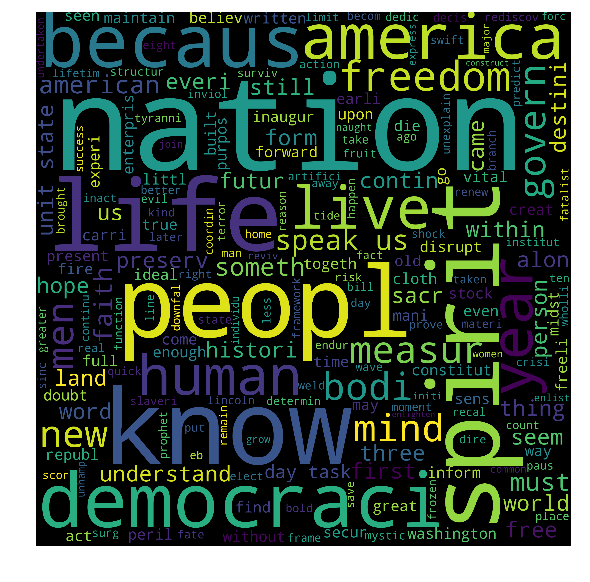

In [185]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Document 1(after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

In [186]:
wc_b = ' '.join(all_words_clean2)
wc_b

'vice presid johnson mr. speaker mr. chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn befor almighti god solemn oath forebear prescrib near centuri three quarter ago world veri differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut let word go forth time place friend foe alik torch pass new generat american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world let everi nation know whether wish us well ill shall pay ani price bear ani burden meet ani hardship support ani friend oppos ani foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin shar

Word Cloud for Document 2 (after cleaning)!!


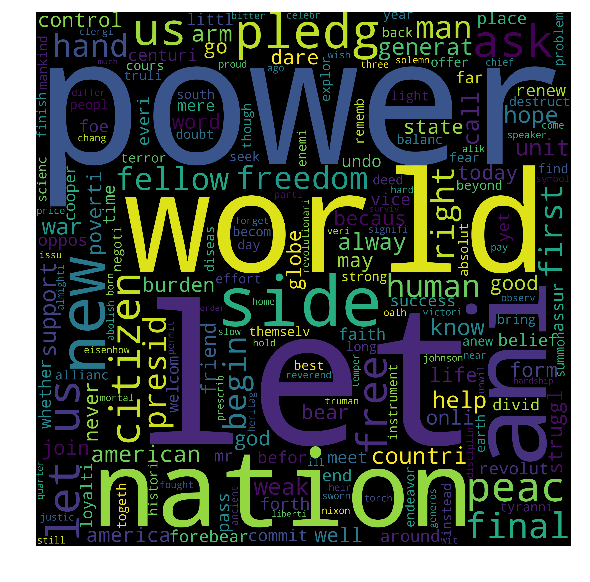

In [187]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Document 2 (after cleaning)!!")
plt.show()

In [188]:
wc_c = ' '.join(all_words_clean3)
wc_c

'mr. vice presid mr. speaker mr. chief justic senat cook mrs. eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seem endless war abroad destruct conflict home meet today stand threshold new era peac world central question befor us shall use peac let us resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad let us resolv becom time great respons great born renew spirit promis america enter third centuri nation past year saw far-reach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world becaus america bold initi 1972 long rememb year greatest progress sinc end world war toward last peac world peac seek world flimsi peac mere interlud war peac endur generat come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom fre

Word Cloud for Document 3 (after cleaning)!!


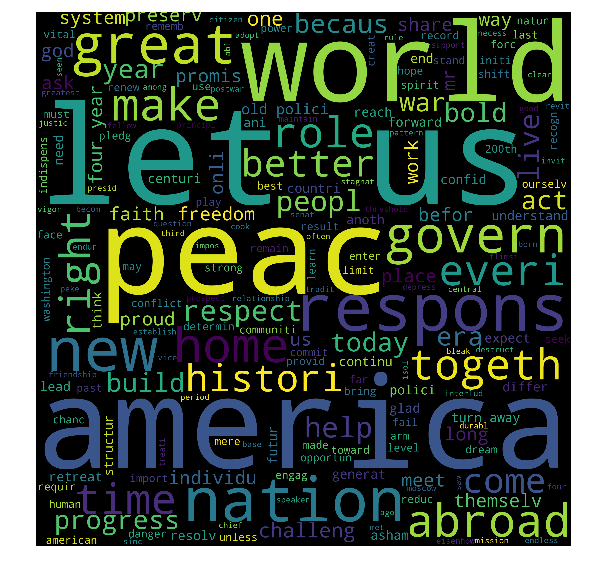

In [189]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Document 3 (after cleaning)!!")
plt.show()

In [190]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in all_words_clean1: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features